In [133]:
# Top 5 países. Desde del año 2000. Género, y que tan fatales fueron los accidentes, actividad. 

In [134]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt


In [135]:
df = pd.read_csv('attacks.csv', encoding='latin1')
pd.set_option('display.max_columns', None) #Para que nos muestre todas las columnas

In [136]:
dim_original= df.shape # Guardando las dimensiones originales antes de limpieza

In [137]:
df.info() # info del DF


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [138]:
df.columns #Columnas

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [139]:
df.head() #primeras 5 filas

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [140]:
df.dtypes 

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [141]:
df.info(memory_usage='deep') #22.8 mb de memoria 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [142]:
nan_cols = df.isna().sum()
columns_with_null= (len(nan_cols[nan_cols>0])/len(df.columns)*100)#porcentaje de las columnas que tienen nulos



In [143]:
df.Age.describe() #la serie de edad no nos da la estadística porque es un objeto

count     3471
unique     157
top         17
freq       154
Name: Age, dtype: object

In [144]:
df.drop_duplicates(inplace= True) #eliminamos los duplicados

In [145]:
df.shape, dim_original #dimensiones despues de eliminar los duplicados

((6312, 24), (25723, 24))

In [146]:
#Eliminamos los espacios en el nombre de las columnas y dejamos todas con la primera letra en mayúscula. 
new_name_columns= []
for i in df.columns:
    new_name_columns.append( i.rstrip())
   
df.columns= new_name_columns

new_name_columns= []

for i in df.columns: 
     new_name_columns.append( i.capitalize())

df.columns= new_name_columns

In [147]:
df.columns

Index(['Case number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (y/n)', 'Time',
       'Species', 'Investigator or source', 'Pdf', 'Href formula', 'Href',
       'Case number.1', 'Case number.2', 'Original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (y/n)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [149]:
#Eliminamos las filas que tengan el valor 0 en el año. 
case_0 = df[df['Year']== 0.0].index
case_0

df.drop(case_0, axis=0, inplace= True)



In [150]:
df.shape, dim_original

((6187, 24), (25723, 24))

In [151]:
df['Year'].isna().sum()

12

In [152]:
df['Date'] = df['Date'].astype(str) #convertimos la serie de fecha a string para eliminar la palabra reported


In [153]:
dates= [] #eliminamos la palabra reported
for i in df['Date']:
    dates.append(i.replace('Reported', ''))
    
df['Date']= dates

In [154]:
#porcentaje del total de ataques por país
df_percentage= df['Country'].value_counts() / 6131*100



df_percentage.head(10)
        
        


USA                 36.078943
AUSTRALIA           21.562551
SOUTH AFRICA         9.313326
PAPUA NEW GUINEA     2.120372
NEW ZEALAND          2.071440
BRAZIL               1.826782
BAHAMAS              1.728919
MEXICO               1.451639
ITALY                1.125428
PHILIPPINES          0.994944
Name: Country, dtype: float64

In [155]:
#Solo el top 3 de paises con más ataques que representa el 66% del total de los ataques

no_country = df[(df['Country']!='USA') & (df['Country']!='AUSTRALIA')& (df['Country']!='SOUTH AFRICA') & (df['Country']!='PAPUA NEW GUINEA') & (df['Country']!='NEW ZEALAND') & (df['Country']!='BRAZIL') & (df['Country']!='MEXICO') & (df['Country']!='ITALY') & (df['Country']!='PHILIPPINES')].index
no_country
df.drop(no_country, axis=0, inplace=True)
df.shape






        

(4693, 24)

In [156]:
#convertimos la columna 'Area' a string para hacer un strip method y quitar los espacios de los valores 



    
No_spacios = []
df['Area'] = df['Area'].astype(str)
for i in df['Area']:
    a=(i.strip())
    b=(a.replace('  Province',' Province'))
    c=(b.replace('KwaZulu-Natal between Port Edward and Port St Johns','KwaZulu-Natal'))
    No_spacios.append(c)
df['Area'] = No_spacios

    

    



In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4693 entries, 0 to 6176
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case number             4692 non-null   object 
 1   Date                    4693 non-null   object 
 2   Year                    4692 non-null   float64
 3   Type                    4692 non-null   object 
 4   Country                 4693 non-null   object 
 5   Area                    4693 non-null   object 
 6   Location                4549 non-null   object 
 7   Activity                4340 non-null   object 
 8   Name                    4593 non-null   object 
 9   Sex                     4307 non-null   object 
 10  Age                     2834 non-null   object 
 11  Injury                  4678 non-null   object 
 12  Fatal (y/n)             4278 non-null   object 
 13  Time                    2500 non-null   object 
 14  Species                 2771 non-null   

In [158]:
#Nos quedamos con los ataques del siglo 21, eliminamos los del sigo 20.

c_20 = df[df['Year']< 2000].index

df.drop(c_20, axis=0, inplace= True)



In [159]:
#Creamos una lista vacia llamada contient para ver en que continente estan los paises de nuestro data frame
continent=[]
for i in df['Country']:
    a= i.replace('USA', 'AMERICA')
    b= a.replace('AUSTRALIA', 'OCEANIA')
    c= b.replace('MEXICO', 'AMERICA')
    d= c.replace('SOUTH AFRICA', 'AFRICA')
    e= d.replace('BRAZIL', 'SOUTH AMERICA')
    f= e.replace('PAPUA NEW GUINEA', 'OCEANIA')
    g= f.replace('ITALY', 'EUROPE')
    h= g.replace('PHILIPPINES', 'ASIA')
    z= h.replace('NEW ZEALAND', 'OCEANIA')
    continent.append(z)
 


In [160]:
#renombramos nuestra serie vacia y le llamamos continent, ahí vamos a poner de que contienente fue cada incidente
df.rename(columns = {'Unnamed: 22': 'Continent'}, inplace = True)



In [161]:
#igualamos
df['Continent'] = continent

In [162]:
#Reemplazamos los nulos por 'Unknown'

df['Location'].fillna('Unknown', inplace=True)
df['Activity'].fillna('Unknown', inplace=True)
df['Name'].fillna('Unknown', inplace=True)
df['Sex'].fillna('Unknown', inplace=True)
df['Age'].fillna('Unknown', inplace=True)
df['Injury'].fillna('Unknown', inplace=True)
df['Fatal (y/n)'].fillna('Unknown', inplace=True)
df['Time'].fillna('Unknown', inplace=True)
df['Species'].fillna('Unknown', inplace=True)
df['Investigator or source'].fillna('Unknown', inplace=True)


In [163]:
#Eliminamos el único valor nulo que tenemos en year. Lo eliminamos en vez de reemplazarlo porque si no se convertiría en un object.
year_drop = df[df['Year'].isna()].index
df.drop(year_drop, axis=0, inplace= True)

In [164]:
df['Year'] = df['Year'].astype(int) # cambiamos la columna 'Year' a integer para que no tenga decimales. 

In [165]:
df['Sex'].value_counts()

M          1331
F           280
Unknown      79
M             2
lli           1
Name: Sex, dtype: int64

In [166]:
# Hay muchos nombres que en vez de aparecer el nombre de la persona, aparece la palabra male.
male = df[df['Name']== 'male'].index

df.drop(male, axis=0, inplace= True)

In [167]:
# Limpiamos los valores de la columna de género  para despues visualizar en el gráfico

lli = df[df['Sex']== 'lli'].index

df.drop(lli, axis=0, inplace= True)

M_bad = df[df['Sex']== 'M '].index

df.drop(M_bad, axis=0, inplace= True)

In [168]:
df['Sex'].value_counts()

M          1156
F           280
Unknown      79
Name: Sex, dtype: int64

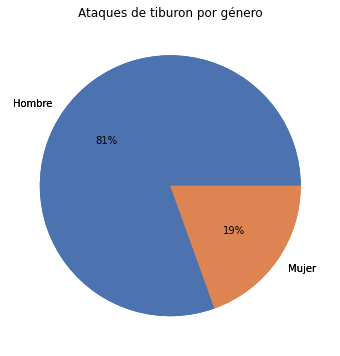

In [169]:
# graficamos el porcentaje de ataques por género
males=  1156 *100 / (1156+280)
females= 280 * 100 / (1156+ 280)
shares= [males, females]
labels= ['Hombre', 'Mujer']

fig = plt.figure(figsize = (6, 6))
plt.pie(shares,labels=labels)
plt.title('Ataques de tiburon por género')
colors = seaborn.color_palette('deep')[0:len(labels)]
plt.pie(shares, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


In [170]:
df['Fatal (y/n)'].value_counts()

N          1300
Unknown     107
Y           105
UNKNOWN       2
2017          1
Name: Fatal (y/n), dtype: int64

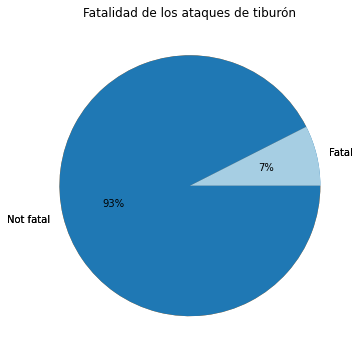

In [171]:
# graficamos el porcentaje de fatalidad en los ataques
fatal= 105* 100 /(1300+105)
no_fatal =1300*100 /(1300+105)
shares_fatality = [fatal, no_fatal]
labels_fatality=['Fatal', 'Not fatal'] 
fig2 = plt.figure(figsize = (6, 6))
plt.pie(shares_fatality,labels=labels_fatality)
plt.title('Fatalidad de los ataques de tiburón')
colors = seaborn.color_palette('Paired')[0:len(labels)]
plt.pie(shares_fatality, labels = labels_fatality, colors = colors, autopct='%.0f%%')
plt.show()


In [172]:
df['Activity'].value_counts().head(10)

Surfing          522
Swimming         205
Fishing           68
Wading            62
Spearfishing      57
Unknown           53
Snorkeling        42
Body boarding     32
Standing          30
Kayaking          23
Name: Activity, dtype: int64

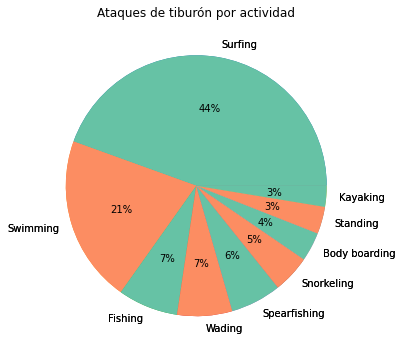

In [173]:
#grafico de los ataques por actividad
surfing= 522*100 / ( 1515 + 522)
swimming= 205*100 / ( 1515 + 205)
fishing= 68*100 / ( 1515 + 68)
wading= 62*100 / ( 1515 + 62)
spearfishing= 57*100 / ( 1515 + 57)
snorkeling= 42*100 / ( 1515 + 42)
body_boarding= 32*100 / ( 1515 + 32)
standing= 30*100 / ( 1515 + 30)
kayaking= 23*100 / ( 1515 + 23)

shares_activity = [surfing, swimming, fishing, wading, spearfishing, snorkeling, body_boarding, standing, kayaking]
labels_activity=['Surfing', 'Swimming', 'Fishing', 'Wading', 'Spearfishing', 'Snorkeling', 'Body boarding', 'Standing', 'Kayaking'] 
fig2 = plt.figure(figsize = (6, 6))
plt.pie(shares_activity,labels=labels_activity)
plt.title('Ataques de tiburón por actividad')
colors = seaborn.color_palette('Set2')[0:len(labels)]
plt.pie(shares_activity, labels = labels_activity, colors = colors, autopct='%.0f%%')
plt.show()



In [174]:
df['Year'].value_counts()

2015    109
2014     91
2008     91
2011     89
2013     88
2017     88
2012     87
2007     87
2009     86
2016     86
2005     79
2006     77
2001     74
2000     74
2002     72
2003     71
2004     67
2010     65
2018     34
Name: Year, dtype: int64

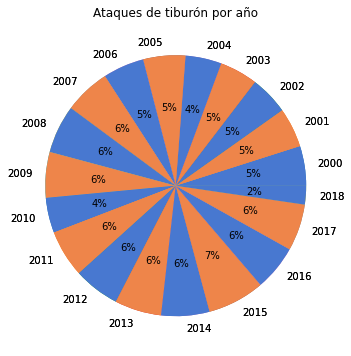

In [175]:
#grafico de los ataques por año
y_2000= 74* 100 / (1515+74)
y_2001= 74* 100 / (1515+74)
y_2002 = 72* 100 / (1515+72)
y_2003 = 71* 100 / (1515+71)
y_2004 = 67* 100 / (1515+67)
y_2005 = 79* 100 / (1515+79)
y_2006 = 77* 100 / (1515+77)
y_2007 = 87* 100 / (1515+87)
y_2008 = 91* 100 / (1515+91)
y_2009 = 86* 100 / (1515+86)
y_2010 = 65* 100 / (1515+65)
y_2011 = 89* 100 / (1515+89)
y_2012 = 87* 100 / (1515+87)
y_2013 = 88* 100 / (1515+88)
y_2014 = 91* 100 / (1515+91)
y_2015 = 109* 100 / (1515+109)
y_2016 = 86* 100 / (1515+96)
y_2017 = 88* 100 / (1515+88)
y_2018 = 34* 100 / (1515+34)

shares_year = [y_2000, y_2001, y_2002, y_2003, y_2004, y_2005, y_2006, y_2007, y_2008, y_2009, y_2010, y_2011, y_2012, y_2013, y_2014, y_2015, y_2016, y_2017, y_2018]
labels_year=['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'] 
fig2 = plt.figure(figsize = (6, 6))
plt.pie(shares_year,labels=labels_year)
plt.title('Ataques de tiburón por año')
colors = seaborn.color_palette('muted')[0:len(labels)]
plt.pie(shares_year, labels = labels_year, colors = colors, autopct='%.0f%%')
plt.show()



In [176]:
df['Country'].value_counts()

USA                 890
AUSTRALIA           357
SOUTH AFRICA        128
BRAZIL               54
NEW ZEALAND          41
MEXICO               25
PHILIPPINES          10
PAPUA NEW GUINEA      6
ITALY                 4
Name: Country, dtype: int64

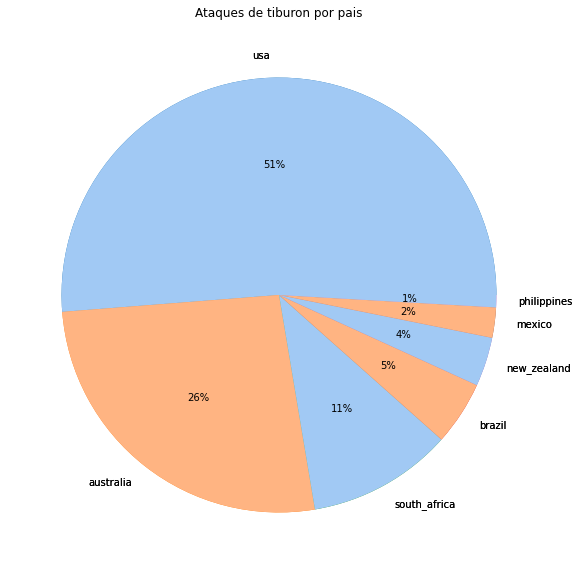

In [181]:
#grafico de los ataques por país
usa= 890*100 /(1515+890)
australia= 357*100 /(1515+357)
south_africa= 128*100 /(1515+128)
brazil= 54*100 /(1515+54)
new_zealand= 41*100 /(1515+41)
mexico= 25*100 /(1515+25)
philippines= 10*100 /(1515+6)


shares_country = [usa, australia, south_africa, brazil, new_zealand, mexico, philippines]
labels_country=['usa', 'australia', 'south_africa', 'brazil', 'new_zealand', 'mexico', 'philippines'] 
fig2 = plt.figure(figsize = (10,10))
plt.pie(shares_country,labels=labels_country)
plt.title('Ataques de tiburon por pais')
colors = seaborn.color_palette('pastel')[0:len(labels)]
plt.pie(shares_country, labels = labels_country, colors = colors, autopct='%.0f%%')
plt.show()

In [178]:
df['Continent'].value_counts()

AMERICA          915
OCEANIA          404
AFRICA           128
SOUTH AMERICA     54
ASIA              10
EUROPE             4
Name: Continent, dtype: int64

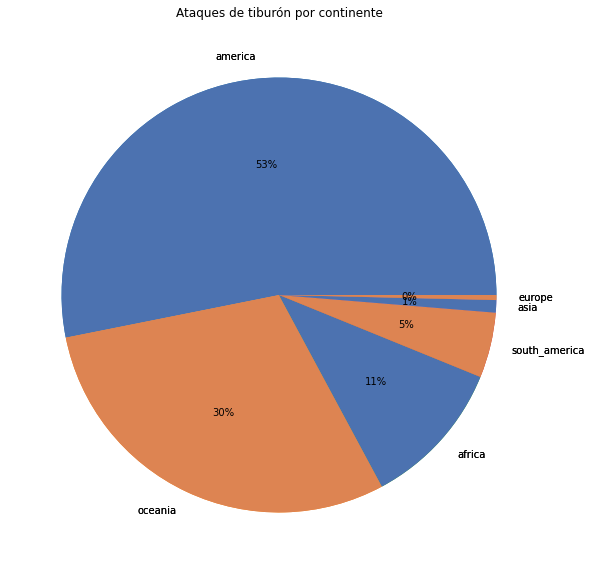

In [182]:
#grafico de los ataques por continente
america= 915*100 /(1515+915)
oceania= 404*100 /(1515+404)
africa= 128*100 /(1515+128)
south_america= 54*100 /(1515+54)
asia= 10*100 /(1515+10)
europe= 4*100 /(1515+4)

shares_continent = [america, oceania, africa, south_america, asia, europe]
labels_continent=['america', 'oceania', 'africa', 'south_america', 'asia', 'europe'] 
fig2 = plt.figure(figsize = (10, 10))
plt.pie(shares_continent,labels=labels_continent)
plt.title('Ataques de tiburón por continente')
colors = seaborn.color_palette('deep')[0:len(labels)]
plt.pie(shares_continent, labels = labels_continent, colors = colors, autopct='%.0f%%')
plt.show()

In [183]:


df.to_csv('DataLimpieza.csv', index=True, sep=';')

